<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/Zadanie_integracja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [7]:
# Część 1:

df_co2_pl = df_co2[df_co2['Entity'] == 'Poland'][['Year', 'Annual CO₂ emissions (per capita)']]

df_primary_energy_pl = df_primary_energy[df_primary_energy['Entity'] == 'Poland'][['Year', 'Primary energy consumption (TWh)']]


df_poland = pd.merge(df_co2_pl, df_primary_energy_pl, on='Year', how='inner')

df_poland.to_csv('poland_energy_co2.csv', index=False)



In [8]:
# Część 2:
countries = ['European Union (27)', 'United States', 'China', 'India']

with pd.ExcelWriter('countries_energy_co2.xlsx') as writer:
    for country in countries:
        df_co2_country = df_co2[df_co2['Entity'] == country][['Year', 'Annual CO₂ emissions (per capita)']]
        df_primary_energy_country = df_primary_energy[df_primary_energy['Entity'] == country][['Year', 'Primary energy consumption (TWh)']]

        df_country = pd.merge(df_co2_country, df_primary_energy_country, on='Year', how='inner')

        df_country.to_excel(writer, sheet_name=country, index=False)


In [9]:
# Część 3:
countries_db = ['Poland', 'Germany', 'Spain']

df_co2_db = df_co2[df_co2['Entity'].isin(countries_db)][['Entity', 'Year', 'Annual CO₂ emissions (per capita)']]
df_primary_energy_db = df_primary_energy[df_primary_energy['Entity'].isin(countries_db)][['Entity', 'Year', 'Primary energy consumption (TWh)']]

df_combined_db = pd.merge(df_co2_db, df_primary_energy_db, on=['Entity', 'Year'], how='inner')

conn = sqlite3.connect('energy_co2.db')
df_combined_db.to_sql('energy_data', conn, if_exists='replace', index=False)
conn.close()


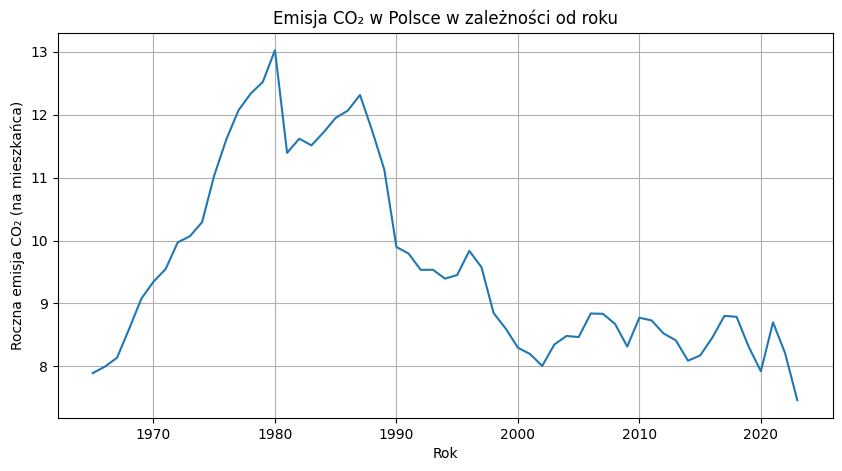

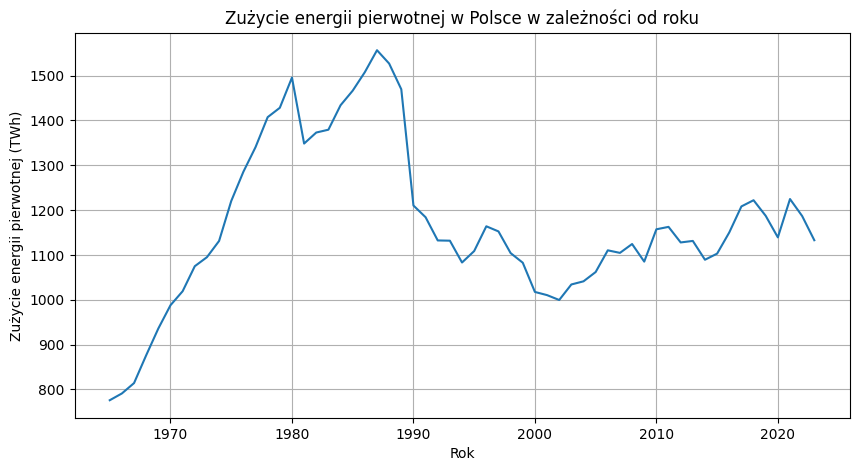

In [10]:
# Część 4:
conn = sqlite3.connect('energy_co2.db')

df_poland_db = pd.read_sql_query("SELECT * FROM energy_data WHERE Entity = 'Poland'", conn)

conn.close()

plt.figure(figsize=(10, 5))
plt.plot(df_poland_db['Year'], df_poland_db['Annual CO₂ emissions (per capita)'])
plt.xlabel('Rok')
plt.ylabel('Roczna emisja CO₂ (na mieszkańca)')
plt.title('Emisja CO₂ w Polsce w zależności od roku')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_poland_db['Year'], df_poland_db['Primary energy consumption (TWh)'])
plt.xlabel('Rok')
plt.ylabel('Zużycie energii pierwotnej (TWh)')
plt.title('Zużycie energii pierwotnej w Polsce w zależności od roku')
plt.grid(True)
plt.show()

In [4]:
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [5]:
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878
